In [1]:
ls = [758.0, 860.0, 690.0, 581.0, 5043.5, 712.0, 1012.0, 829.5, 4774.5, 7550.5, 1134.0, 1310.0, 935.5, 9042.0, 8909.5, 723.5, 1103.0, 880.0, 635.0, 5535.5, 1555.0]

In [2]:
import numpy as np
import pandas as pd

In [22]:
bike_real_results = [7,7,11,8,7,15,2,6,6,11,5,8,9,7,10,10,7,13,15,22,11,6,10,4,3,2,12,7]

In [25]:
car_real_results = [5,7,10,9,11,8,9,5,8,9,8,10,8,6,9,8,10,12,8,9,12,11,8,5,9,4,9,12]
len(car_real_results)

28

In [4]:
df = pd.DataFrame({"area":ls})

In [5]:
df

,area
0,758.0
1,860.0
2,690.0
3,581.0
4,5043.5
5,712.0
6,1012.0
7,829.5
8,4774.5
9,7550.5


In [6]:
df[df['area']<1000]

,area
0,758.0
1,860.0
2,690.0
3,581.0
5,712.0
7,829.5
12,935.5
15,723.5
17,880.0
18,635.0


In [11]:
df[(df['area']>2000) & (df['area'] < 5500)]

,area
4,5043.5
8,4774.5


In [15]:
df[df['area']>5000].count().values[0]

5

In [19]:
import numpy as np
import cv2
import pandas as pd
#import imutils

def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

#original = 'frames/8.png'
#E = 'erode8.png'
def count_image(erode_image,original):
    image = cv2.imread(erode_image,0)
    o  = cv2.imread(original,0)
    #---- removing the noise 
    #Gimg  = cv2.GaussianBlur(image,(7,7),0)
    #image = cv2.erode(image,None,iterations=1)
    image = cv2.dilate(image,None,iterations=1)

    #cv2.imshow("erode",image)
    #cv2.waitKey(0)
    image = image[30:,:]
    vehicle_count=0

    image = cv2.dilate(image,None,iterations=5)
    cv2.imwrite("dilated.png",image)
    cv2.waitKey(0)

    cnts, hierarchy = cv2.findContours(image, cv2.RNG_UNIFORM, cv2.CHAIN_APPROX_NONE)
    multiple_contours = []
    max_contours = []
    for c in cnts:
        orig = image.copy()
        area = cv2.contourArea(c)
        if area > 550:
            multiple_contours.append(c)
            max_contours.append(area)
            vehicle_count+=1
        #print(area)
        box = cv2.minAreaRect(c)
        #print(box)
        #print(box)
        #cv2.imshow('counts',ximg)
        #cv2.waitKey(0)
        #cv2.drawContours(orig,c,-1,(139,131,255),3)
        #cv2.imshow("erotion",orig)
        
        cv2.waitKey(0)
    #ximg = cv2.dilate(orig,None,iterations=2)
    #cv2.imshow("DILATION",ximg)
    cv2.waitKey(0)
    cv2.drawContours(o,multiple_contours,-1,(19,20,25),2)
    #print(vehicle_count)
    df = pd.DataFrame({'area':max_contours})
    #print(f"CARS -----> {df[df['area'] > 2000].count().values[0]}")
    #print(f"bikes -----> {df[df['area'] <= 1500].count().values[0]}")
    
    cars = df[df['area'] > 2000].count().values[0]
    bikes = df[df['area'] <= 1500].count().values[0]
    cv2.putText(o,str(vehicle_count),(10,90),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
    #cv2.imshow("IMAGE",o)
    #cv2.waitKey(0)
    #cv2.imwrite(f"o{k}.png",o)
    
    #print(image)
    #cv2.destroyAllWindows()
    return cars,bikes

In [110]:
real_outputs

,cars,bike
1,5,7
2,7,7
3,10,11
4,9,8
5,11,7
6,8,15
7,9,2
8,5,6
9,8,6
10,9,11


In [11]:
cars_count = []
bikes_count = []
for i in range(1,29):
    c,b = count_image(f'erode{i}.png',f'frames/{i}.png')
    cars_count.append(c)
    bikes_count.append(b)

11
CARS -----> 5
bikes -----> 6
15
CARS -----> 7
bikes -----> 8
21
CARS -----> 10
bikes -----> 11
22
CARS -----> 11
bikes -----> 11
21
CARS -----> 9
bikes -----> 12
21
CARS -----> 6
bikes -----> 15
12
CARS -----> 8
bikes -----> 4
15
CARS -----> 5
bikes -----> 10
13
CARS -----> 9
bikes -----> 4
18
CARS -----> 9
bikes -----> 9
13
CARS -----> 8
bikes -----> 5
19
CARS -----> 9
bikes -----> 10
14
CARS -----> 8
bikes -----> 6
12
CARS -----> 6
bikes -----> 6
18
CARS -----> 8
bikes -----> 10
13
CARS -----> 7
bikes -----> 6
16
CARS -----> 8
bikes -----> 8
21
CARS -----> 10
bikes -----> 11
20
CARS -----> 8
bikes -----> 12
22
CARS -----> 9
bikes -----> 13
21
CARS -----> 11
bikes -----> 10
18
CARS -----> 8
bikes -----> 10
15
CARS -----> 7
bikes -----> 8
8
CARS -----> 5
bikes -----> 3
13
CARS -----> 7
bikes -----> 6
8
CARS -----> 3
bikes -----> 5
20
CARS -----> 7
bikes -----> 13
18
CARS -----> 7
bikes -----> 11


In [12]:
count_200_range = pd.DataFrame({'cars':cars_count,'bikes':bikes_count})
count_200_range

,cars,bikes
0,5,6
1,7,8
2,10,11
3,11,11
4,9,12
5,6,15
6,8,4
7,5,10
8,9,4
9,9,9


In [9]:
count_image(f'erode{i}.png',f'frames/{i}.png')

18
CARS -----> 7
bikes -----> 11


(7, 0)

In [17]:
cars_count = []
bikes_count = []
for i in range(1,29):
    c,b = count_image(f'erode{i}.png',f'frames/{i}.png')
    cars_count.append(c)
    bikes_count.append(b)

In [21]:
count_1500_range = pd.DataFrame({'cars':cars_count,'bikes':bikes_count},index=[i for i in range(1,29)])
count_1500_range

,cars,bikes
1,5,6
2,7,8
3,10,11
4,11,11
5,9,12
6,6,15
7,8,4
8,5,10
9,9,4
10,9,9


In [58]:
real_outputs = pd.DataFrame({'cars':car_real_results,'bike':bike_real_results},index=[i for i in range(1,29)])

In [59]:
real_outputs

,cars,bike
1,5,7
2,7,7
3,10,11
4,9,8
5,11,7
6,8,15
7,9,2
8,5,6
9,8,6
10,9,11


In [39]:
output = np.where(count_1500_range['cars'] == real_outputs['cars'],True,False)
output = pd.DataFrame({'results':output})

In [44]:
output[output['results'] == True]

,results
0,True
1,True
2,True
7,True
9,True
10,True
12,True
13,True
18,True
19,True


In [56]:
import numpy as np
import cv2
import pandas as pd
#import imutils

def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

#original = 'frames/8.png'
#E = 'erode8.png'
def GNN_DATA(erode_image,original,bike_range,car_range):
    image = cv2.imread(erode_image,0)
    o  = cv2.imread(original,0)
    #---- removing the noise 
    #Gimg  = cv2.GaussianBlur(image,(7,7),0)
    #image = cv2.erode(image,None,iterations=1)
    image = cv2.dilate(image,None,iterations=1)

    #cv2.imshow("erode",image)
    #cv2.waitKey(0)
    image = image[30:,:]
    vehicle_count=0

    image = cv2.dilate(image,None,iterations=5)
    cv2.imwrite("dilated.png",image)
    cv2.waitKey(0)

    cnts, hierarchy = cv2.findContours(image, cv2.RNG_UNIFORM, cv2.CHAIN_APPROX_NONE)
    multiple_contours = []
    max_contours = []
    for c in cnts:
        orig = image.copy()
        area = cv2.contourArea(c)
        if area > 550:
            multiple_contours.append(c)
            max_contours.append(area)
            vehicle_count+=1
        #print(area)
        box = cv2.minAreaRect(c)
        #print(box)
        #print(box)
        #cv2.imshow('counts',ximg)
        #cv2.waitKey(0)
        #cv2.drawContours(orig,c,-1,(139,131,255),3)
        #cv2.imshow("erotion",orig)
        
        cv2.waitKey(0)
    #ximg = cv2.dilate(orig,None,iterations=2)
    #cv2.imshow("DILATION",ximg)
    cv2.waitKey(0)
    cv2.drawContours(o,multiple_contours,-1,(19,20,25),2)
    #print(vehicle_count)
    df = pd.DataFrame({'area':max_contours})
    #print(f"CARS -----> {df[df['area'] > 2000].count().values[0]}")
    #print(f"bikes -----> {df[df['area'] <= 1500].count().values[0]}")
    
    cars = df[df['area'] > car_range].count().values[0]
    bikes = df[df['area'] <= bike_range].count().values[0]
    cv2.putText(o,str(vehicle_count),(10,90),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
    #cv2.imshow("IMAGE",o)
    #cv2.waitKey(0)
    #cv2.imwrite(f"o{k}.png",o)
    
    #print(image)
    #cv2.destroyAllWindows()
    return cars,bikes

In [103]:
results = {'bike_range':[],'car_range':[],'accuracy_bike%':[],'accuracy_car%':[],'cars_detected':[],'bike_detected':[]}
for i in range(100):
    print(f'iter ===> {i} ')
    bike_range = np.random.randint(1500,1800)
    car_range = np.random.randint(1800,2000)
    cars_count = []
    bikes_count = []
    for i in range(1,29):
        c,b = GNN_DATA(f'erode{i}.png',f'frames/{i}.png',bike_range,car_range)
        cars_count.append(c)
        bikes_count.append(b)
    detected = pd.DataFrame({'cars':cars_count,'bikes':bikes_count},index=[i for i in range(1,29)])
    car_output = np.where(detected['cars'] == real_outputs['cars'],True,False,)
    bike_output = np.where(detected['bikes'] == real_outputs['bike'],True,False)
    outputcar = pd.DataFrame({'results':car_output})
    outputbike = pd.DataFrame({'results':bike_output})
    results['bike_range'].append(bike_range)
    results['car_range'].append(car_range)
    results['accuracy_car%'].append(len(outputcar[outputcar['results']==True])/28)
    results['accuracy_bike%'].append(len(outputbike[outputbike['results']==True])/28)
    results['cars_detected'].append(len(outputcar[outputcar['results']==True]))
    results['bike_detected'].append(len(outputbike[outputbike['results']==True]))

iter ===> 0 
iter ===> 1 
iter ===> 2 
iter ===> 3 
iter ===> 4 
iter ===> 5 
iter ===> 6 
iter ===> 7 
iter ===> 8 
iter ===> 9 
iter ===> 10 
iter ===> 11 
iter ===> 12 
iter ===> 13 
iter ===> 14 
iter ===> 15 
iter ===> 16 
iter ===> 17 
iter ===> 18 
iter ===> 19 
iter ===> 20 
iter ===> 21 
iter ===> 22 
iter ===> 23 
iter ===> 24 
iter ===> 25 
iter ===> 26 
iter ===> 27 
iter ===> 28 
iter ===> 29 
iter ===> 30 
iter ===> 31 
iter ===> 32 
iter ===> 33 
iter ===> 34 
iter ===> 35 
iter ===> 36 
iter ===> 37 
iter ===> 38 
iter ===> 39 
iter ===> 40 
iter ===> 41 
iter ===> 42 
iter ===> 43 
iter ===> 44 
iter ===> 45 
iter ===> 46 
iter ===> 47 
iter ===> 48 
iter ===> 49 
iter ===> 50 
iter ===> 51 
iter ===> 52 
iter ===> 53 
iter ===> 54 
iter ===> 55 
iter ===> 56 
iter ===> 57 
iter ===> 58 
iter ===> 59 
iter ===> 60 
iter ===> 61 
iter ===> 62 
iter ===> 63 
iter ===> 64 
iter ===> 65 
iter ===> 66 
iter ===> 67 
iter ===> 68 
iter ===> 69 
iter ===> 70 
iter ===> 71 
it

In [104]:
final = pd.DataFrame(results)
final

,bike_range,car_range,accuracy_bike%,accuracy_car%,cars_detected,bike_detected
0,1635,1991,0.250000,0.357143,10,7
1,1795,1992,0.142857,0.357143,10,4
2,1640,1986,0.250000,0.357143,10,7
3,1523,1998,0.214286,0.357143,10,6
4,1674,1862,0.214286,0.321429,9,6
...,...,...,...,...,...,...
95,1616,1920,0.250000,0.392857,11,7
96,1605,1863,0.250000,0.321429,9,7
97,1707,1905,0.107143,0.357143,10,3
98,1635,1823,0.250000,0.357143,10,7


In [107]:
final[final['accuracy_car%'] > .30]

,bike_range,car_range,accuracy_bike%,accuracy_car%,cars_detected,bike_detected
0,1635,1991,0.250000,0.357143,10,7
1,1795,1992,0.142857,0.357143,10,4
2,1640,1986,0.250000,0.357143,10,7
3,1523,1998,0.214286,0.357143,10,6
4,1674,1862,0.214286,0.321429,9,6
...,...,...,...,...,...,...
95,1616,1920,0.250000,0.392857,11,7
96,1605,1863,0.250000,0.321429,9,7
97,1707,1905,0.107143,0.357143,10,3
98,1635,1823,0.250000,0.357143,10,7


In [109]:
final[final['accuracy_bike%'] > .20]

,bike_range,car_range,accuracy_bike%,accuracy_car%,cars_detected,bike_detected
0,1635,1991,0.250000,0.357143,10,7
2,1640,1986,0.250000,0.357143,10,7
3,1523,1998,0.214286,0.357143,10,6
4,1674,1862,0.214286,0.321429,9,6
5,1506,1843,0.214286,0.321429,9,6
...,...,...,...,...,...,...
94,1660,1943,0.214286,0.357143,10,6
95,1616,1920,0.250000,0.392857,11,7
96,1605,1863,0.250000,0.321429,9,7
98,1635,1823,0.250000,0.357143,10,7


In [101]:
r1 = final.copy()

In [102]:
r1

,bike_range,car_range,accuracy_bike%,accuracy_car%,cars_detected,bike_detected
0,1035,1125,0.142857,0.107143,3,4
1,1067,1162,0.142857,0.142857,4,4
2,1018,1129,0.107143,0.107143,3,3
3,1083,1123,0.142857,0.107143,3,4
4,1053,1146,0.142857,0.142857,4,4
...,...,...,...,...,...,...
95,1092,1184,0.142857,0.142857,4,4
96,1057,1170,0.142857,0.107143,3,4
97,1038,1169,0.142857,0.107143,3,4
98,1069,1169,0.142857,0.107143,3,4


In [111]:
import matplotlib.pyplot as plt

In [117]:
ls = []
for i in range(0,28):
    object_life = real_outputs.iloc[i,0] + real_outputs.iloc[i,0]
    ls.append(object_life)

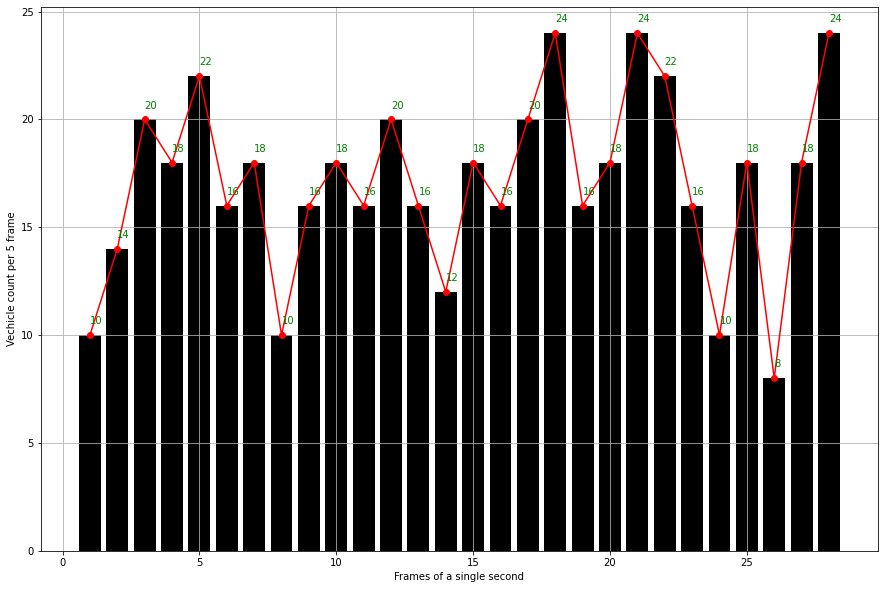

<Figure size 432x288 with 0 Axes>

In [124]:
plt.figure(figsize = (15,10))
x = [x for x in range(1,29)]
for i in range(0,28):
    plt.annotate(ls[i], xy = (x[i],ls[i]+0.5),color = 'g')
plt.xlabel("Frames of a single second")
plt.ylabel("Vechicle count per 5 frame")
plt.grid()
plt.plot([i for i in range(1,29)],ls,marker='o',color ='r')

plt.bar([i for i in range(1,29)],ls,color ='black')
plt.show()
plt.savefig('realvehicle.png')